In [1]:
import pandas as pd #import library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df = pd.read_csv('train.csv') #read data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe() #summary of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum() #total missing value in data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#handling missing value
df['Age']=df['Age'].ffill()
df=df.drop(labels ='Cabin',axis=1)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.duplicated().sum() #check duplicade in data

0

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Simple Visualisation

Text(0.5, 1.0, 'Passanger Class Distribution')

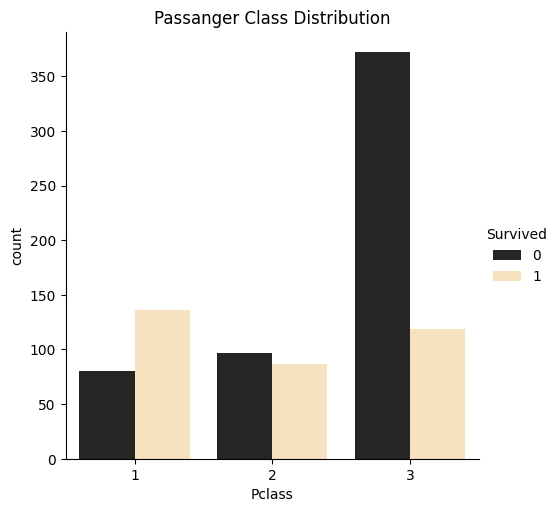

In [10]:
sns.catplot(x = "Pclass",hue ='Survived', kind = "count", data = df,palette='dark:moccasin')
plt.title("Passanger Class Distribution")

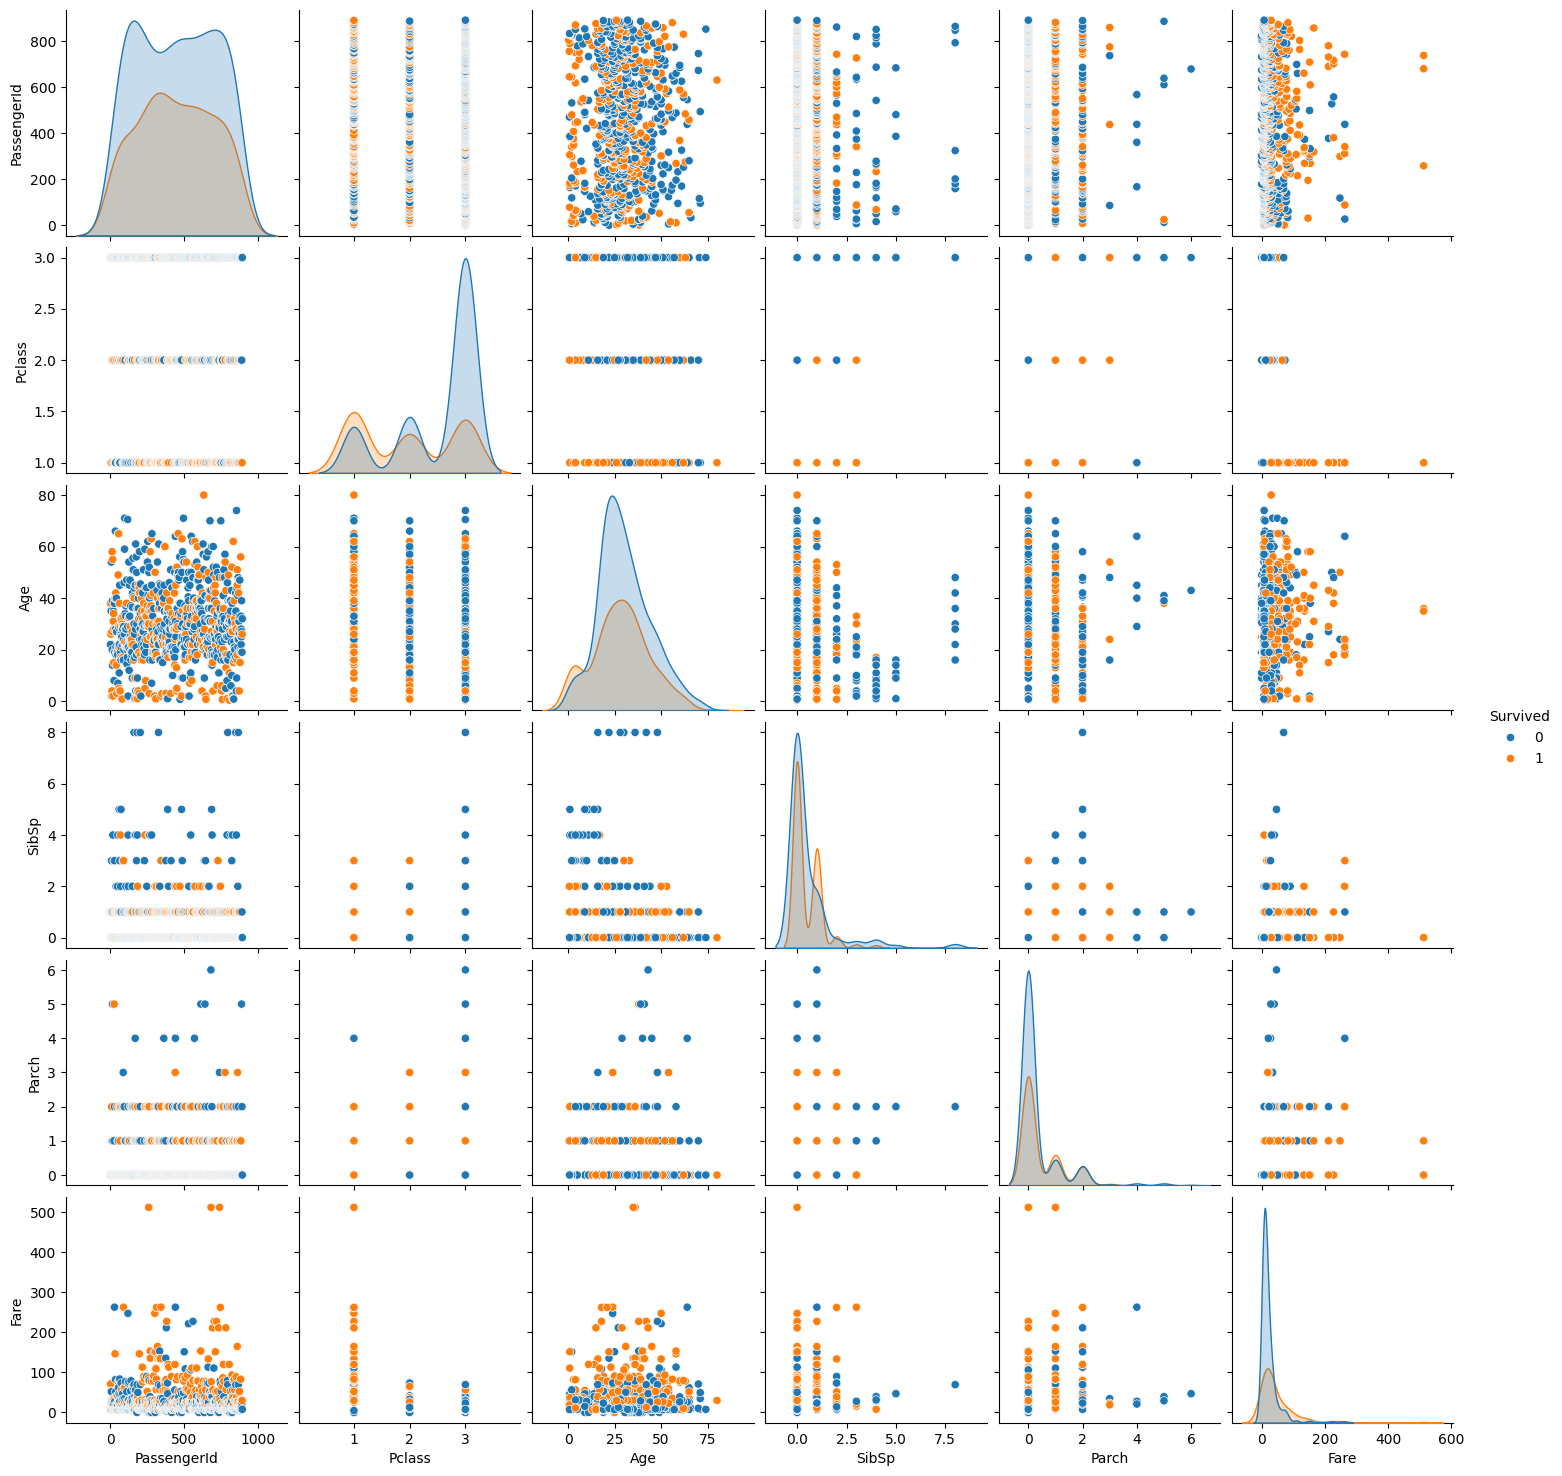

In [11]:
sns.pairplot(df, hue = "Survived")

<Axes: ylabel='Survived'>

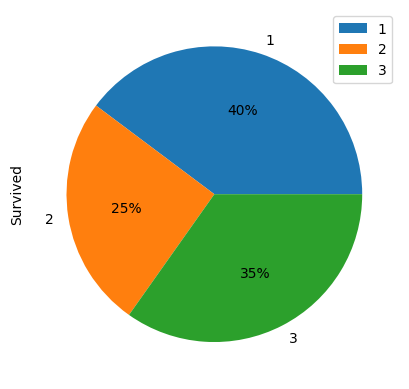

In [48]:
df.groupby('Pclass').sum().plot(kind='pie', y='Survived', autopct='%1.0f%%') #total percentange who survived from each pclass (autopct for adding percentage)

<Axes: >

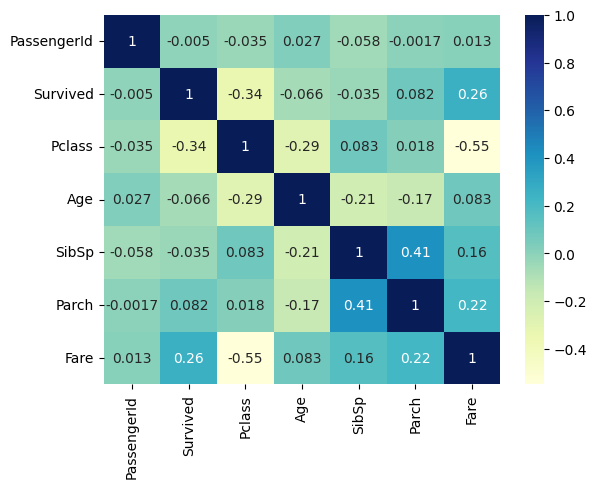

In [13]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True) #how about correlation of each feature

In [14]:
df.columns #check column name

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
newdata = df.groupby('Pclass').size().rename_axis('PclassCategory').reset_index(name='Count')
newdata.head()

,PclassCategory,Count
0,1,216
1,2,184
2,3,491


In [16]:
label= newdata['PclassCategory']
values = newdata.Count

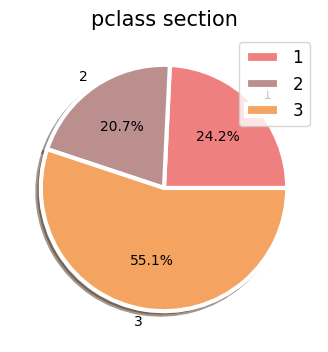

In [17]:
# Simple Pie Chart for show the pclass distribution
plt.figure(figsize=(5,4))
color = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
# Create a pieplot
plt.pie(values,labels=label,labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%',colors=color,shadow =True)
plt.legend(label, loc='best', fontsize=12)
plt.title('pclass section',size=15)
plt.show()

## Data Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder() #convert category data to numeric
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [20]:
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


## normalisazion

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [22]:
scaler = MinMaxScaler()
df['Age']=scaler.fit_transform(df['Age'].values.reshape(-1,1))
df['Fare']=scaler.fit_transform(df['Fare'].values.reshape(-1,1))

In [23]:
scaler

MinMaxScaler()

## separate x and y and modeling


In [24]:
y = df['Survived']
x = df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [25]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [26]:
#make xtrain,ytrain with 80,20
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
model = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [29]:
#predict
y_pred=model.predict(x_test)

In [30]:
print("Accuracy KNN :",accuracy_score(y_test,y_pred))

Accuracy KNN : 0.8212290502793296


In [31]:
cf=confusion_matrix(y_test,y_pred)

In [32]:
print(f'confusion matrix:\n', cf)

confusion matrix:
 [[95 10]
 [22 52]]


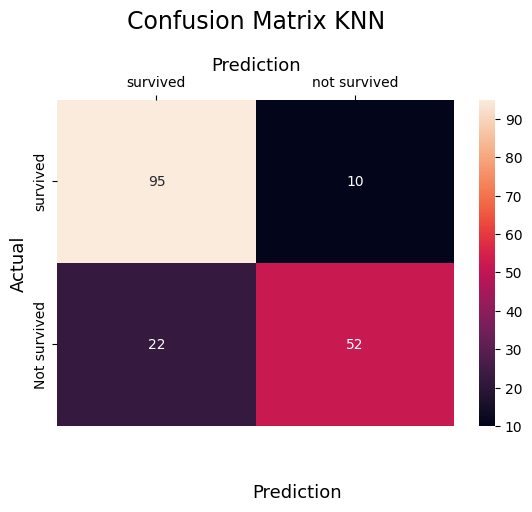

In [33]:
#ploting confusion matrix
sns.heatmap(cf,
            annot=True,
            fmt='g',
            xticklabels=['survived','not survived'],
            yticklabels=['survived','Not survived'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix KNN', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [34]:
#PLOT ACTUAL COMPARISON
data = pd.DataFrame({
    'actual': y_test,
    'predicted_KNN':y_pred})
data.head()

,actual,predicted_KNN
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1


## logistic linier Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred_Lo=model.predict(x_test)

In [38]:
print("Accuracy Logistic Regression :",accuracy_score(y_test,y_pred_Lo))
print('Precision Logistic Regression :', precision_score(y_test,y_pred_Lo))

Accuracy Logistic Regression : 0.7988826815642458
Precision Logistic Regression : 0.7638888888888888


In [39]:
#confusion matrix logistic regression
cf_Lo=confusion_matrix(y_test,y_pred_Lo)

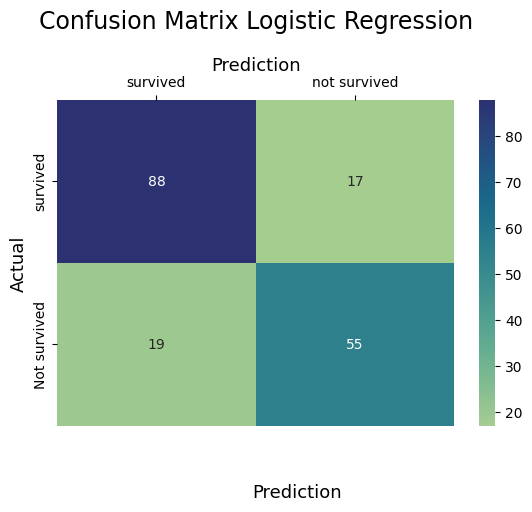

In [40]:
#ploting confusion matrix
sns.heatmap(cf_Lo,
            annot=True,
            fmt='g',
            cmap="crest",
            xticklabels=['survived','not survived'],
            yticklabels=['survived','Not survived'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix Logistic Regression', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier(n_estimators=200,max_depth = 10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [43]:
y_pred_RF= model.predict(x_test)

In [44]:
print('Accuracy Random Forest', accuracy_score(y_test,y_pred_RF))
print('Precision Random Forest', precision_score(y_test,y_pred_RF))

Accuracy Random Forest 0.8324022346368715
Precision Random Forest 0.8333333333333334


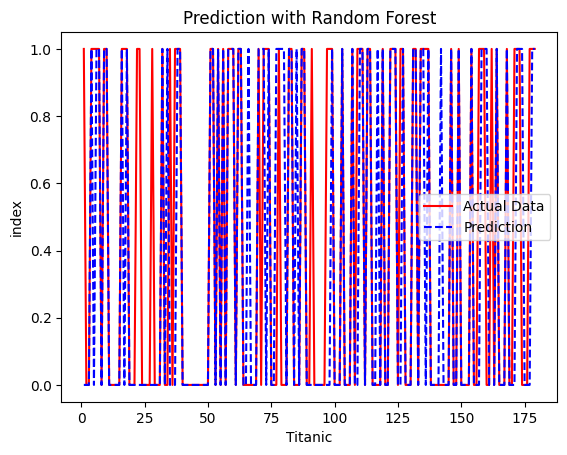

In [45]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_RF,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Titanic')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [46]:
#confusion matrix
cf_RF= confusion_matrix(y_test,y_pred_RF)

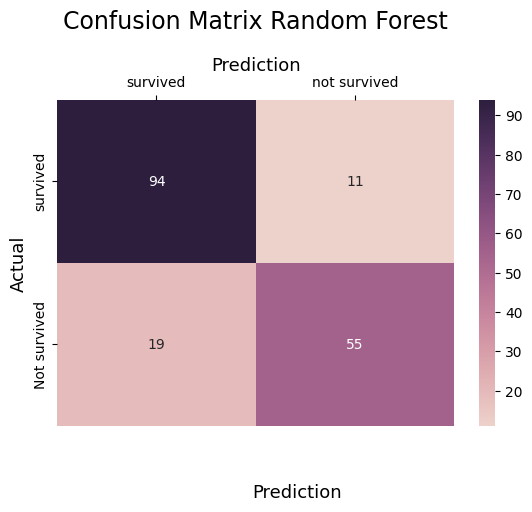

In [47]:
#ploting confusion matrix
sns.heatmap(cf_RF,
            annot=True,
            fmt='g',
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=['survived','not survived'],
            yticklabels=['survived','Not survived'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix Random Forest', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()